In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 700)

Aim of this notebook is to map SOD-labeled images to PMI, and perform a correlation analysis between SOD and PMI.

**Note**: Column name prefixed with 'old' represent data before old-to-new ID mapping, and names prefixed with 'new' after.

# Map SOD-labeled data to PMI

In [36]:
# import PMI data
df_pmi = pd.read_csv('../data/img_PMIs_no_negs.csv', )
display(df_pmi.head())
print(df_pmi.shape)

,new_id,new_img,old_path,new_path,old_id,old_img,old_month,old_day,old_yr,old_date,date_placed_ARF,img_pmi_days
0,000,00000121.01.JPG,/da1_data/icputrd/arf/mean.js/public/2018/UT01-18D/Daily Photos/UT01-18D_01_21_2018 (1).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/000/00000121.01.JPG,UT01-18D,UT01-18D_01_21_2018 (1).JPG,1,21,2018,2018-01-21,2018-01-21,0.0
1,000,00000121.02.JPG,/da1_data/icputrd/arf/mean.js/public/2018/UT01-18D/Daily Photos/UT01-18D_01_21_2018 (2).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/000/00000121.02.JPG,UT01-18D,UT01-18D_01_21_2018 (2).JPG,1,21,2018,2018-01-21,2018-01-21,0.0
2,000,00000121.03.JPG,/da1_data/icputrd/arf/mean.js/public/2018/UT01-18D/Daily Photos/UT01-18D_01_21_2018 (3).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/000/00000121.03.JPG,UT01-18D,UT01-18D_01_21_2018 (3).JPG,1,21,2018,2018-01-21,2018-01-21,0.0
3,000,00000121.04.JPG,/da1_data/icputrd/arf/mean.js/public/2018/UT01-18D/Daily Photos/UT01-18D_01_21_2018 (4).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/000/00000121.04.JPG,UT01-18D,UT01-18D_01_21_2018 (4).JPG,1,21,2018,2018-01-21,2018-01-21,0.0
4,000,00000121.05.JPG,/da1_data/icputrd/arf/mean.js/public/2018/UT01-18D/Daily Photos/UT01-18D_01_21_2018 (5).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/000/00000121.05.JPG,UT01-18D,UT01-18D_01_21_2018 (5).JPG,1,21,2018,2018-01-21,2018-01-21,0.0


(1129871, 12)


In [52]:
# import SOD-labeled data
df_sod = pd.read_csv('/data/anau/SOD_classification/data/torso/torso_labeled_prop_0_0.merged', 
                        header=None, delimiter=',', usecols=[0,1])
df_sod.columns = ['path', 'label']
display(df_sod.head())
print(df_sod.shape)

,path,label
0,/da1_data/icputrd/arf/mean.js/public/sara_img/34d/34d00228.16.JPG,1
1,/da1_data/icputrd/arf/mean.js/public/sara_img/db7/db700607.11.JPG,2
2,/da1_data/icputrd/arf/mean.js/public/sara_img/0db/0db00530.07.JPG,1
3,/da1_data/icputrd/arf/mean.js/public/sara_img/a18/a1800325.07.JPG,1
4,/da1_data/icputrd/arf/mean.js/public/sara_img/2c3/2c310131.18.JPG,2


(4342, 2)


In [53]:
# process path column
df_sod['path'] = df_sod['path'].str.replace('.icon','')
#df_sod['path'] = df_sod['path'].str.replace('/anau_img3/','/da1_data/icputrd/arf/mean.js/public/anau_img3/')
df_sod['path'] = df_sod['path'].str.replace('/sara_img/','/anau_img3/')
df_sod['label'] = df_sod['label'] + 1 # if needed
df_sod['img'] = df_sod['path'].str.split('/').str[-1]
display(df_sod.head())
print(df_sod.shape)

<ipython-input-53-a2bfa830f489>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sod['path'] = df_sod['path'].str.replace('.icon','')


,path,label,img
0,/da1_data/icputrd/arf/mean.js/public/anau_img3/34d/34d00228.16.JPG,2,34d00228.16.JPG
1,/da1_data/icputrd/arf/mean.js/public/anau_img3/db7/db700607.11.JPG,3,db700607.11.JPG
2,/da1_data/icputrd/arf/mean.js/public/anau_img3/0db/0db00530.07.JPG,2,0db00530.07.JPG
3,/da1_data/icputrd/arf/mean.js/public/anau_img3/a18/a1800325.07.JPG,2,a1800325.07.JPG
4,/da1_data/icputrd/arf/mean.js/public/anau_img3/2c3/2c310131.18.JPG,3,2c310131.18.JPG


(4342, 3)


In [54]:
# join SOD-labeled data with PMI data
df_sod_pmi = pd.merge(df_sod, df_pmi, left_on="path", right_on="new_path",
                    how='inner')
df_sod_pmi.sort_values(by='path', inplace=True)
display(df_sod_pmi.head())
print(df_sod_pmi.shape, df_sod.shape)

,path,label,img,new_id,new_img,old_path,new_path,old_id,old_img,old_month,old_day,old_yr,old_date,date_placed_ARF,img_pmi_days
455,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00311.05.JPG,2,00b00311.05.JPG,00b,00b00311.05.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_03_11_2016 (5).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00311.05.JPG,UT16-16D,UT16-16D_03_11_2016 (5).JPG,3,11,2016,2016-03-11,2016-03-07,4.0
2112,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00311.10.JPG,2,00b00311.10.JPG,00b,00b00311.10.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_03_11_2016 (10).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00311.10.JPG,UT16-16D,UT16-16D_03_11_2016 (10).JPG,3,11,2016,2016-03-11,2016-03-07,4.0
2113,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00311.22.JPG,2,00b00311.22.JPG,00b,00b00311.22.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_03_11_2016 (22).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00311.22.JPG,UT16-16D,UT16-16D_03_11_2016 (22).JPG,3,11,2016,2016-03-11,2016-03-07,4.0
1470,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00330.15.JPG,2,00b00330.15.JPG,00b,00b00330.15.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_03_30_2016 (15).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00330.15.JPG,UT16-16D,UT16-16D_03_30_2016 (15).JPG,3,30,2016,2016-03-30,2016-03-07,23.0
1468,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00330.16.JPG,2,00b00330.16.JPG,00b,00b00330.16.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_03_30_2016 (16).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00330.16.JPG,UT16-16D,UT16-16D_03_30_2016 (16).JPG,3,30,2016,2016-03-30,2016-03-07,23.0


(2718, 15) (4342, 3)


In [55]:
df_sod_pmi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2718 entries, 455 to 1250
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   path             2718 non-null   object 
 1   label            2718 non-null   int64  
 2   img              2718 non-null   object 
 3   new_id           2718 non-null   object 
 4   new_img          2718 non-null   object 
 5   old_path         2718 non-null   object 
 6   new_path         2718 non-null   object 
 7   old_id           2718 non-null   object 
 8   old_img          2718 non-null   object 
 9   old_month        2718 non-null   int64  
 10  old_day          2718 non-null   int64  
 11  old_yr           2718 non-null   int64  
 12  old_date         2718 non-null   object 
 13  date_placed_ARF  2718 non-null   object 
 14  img_pmi_days     2718 non-null   float64
dtypes: float64(1), int64(4), object(10)
memory usage: 339.8+ KB


In [56]:
df_sod_pmi.describe()

,label,old_month,old_day,old_yr,img_pmi_days
count,2718.000000,2718.000000,2718.000000,2718.000000,2718.000000
mean,2.832597,5.504047,16.009566,2013.606696,48.243561
std,0.814126,2.730804,8.754236,1.147329,40.663031
min,1.000000,1.000000,1.000000,2011.000000,0.000000
25%,2.000000,4.000000,9.000000,2013.000000,20.000000
50%,3.000000,5.000000,16.500000,2013.000000,35.000000
75%,4.000000,7.000000,23.000000,2014.000000,74.000000
max,4.000000,12.000000,31.000000,2017.000000,242.000000


In [57]:
# save data
df_sod_pmi.to_csv('../data/torso/torso_sod_to_pmi', index=False)

# PMI analysis per SOD

In [45]:
#df_sod_pmi = pd.read_csv('../data/head/head_sod_pmi')
display(df_sod_pmi.head())
df_sod_pmi.shape

,path,label,img,new_id,new_img,old_path,new_path,old_id,old_img,old_month,old_day,old_yr,old_date,date_placed_ARF,img_pmi_days
455,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00311.05.JPG,1,00b00311.05.JPG,00b,00b00311.05.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_03_11_2016 (5).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00311.05.JPG,UT16-16D,UT16-16D_03_11_2016 (5).JPG,3,11,2016,2016-03-11,2016-03-07,4.0
2112,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00311.10.JPG,1,00b00311.10.JPG,00b,00b00311.10.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_03_11_2016 (10).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00311.10.JPG,UT16-16D,UT16-16D_03_11_2016 (10).JPG,3,11,2016,2016-03-11,2016-03-07,4.0
2113,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00311.22.JPG,1,00b00311.22.JPG,00b,00b00311.22.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_03_11_2016 (22).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00311.22.JPG,UT16-16D,UT16-16D_03_11_2016 (22).JPG,3,11,2016,2016-03-11,2016-03-07,4.0
1470,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00330.15.JPG,1,00b00330.15.JPG,00b,00b00330.15.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_03_30_2016 (15).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00330.15.JPG,UT16-16D,UT16-16D_03_30_2016 (15).JPG,3,30,2016,2016-03-30,2016-03-07,23.0
1468,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00330.16.JPG,1,00b00330.16.JPG,00b,00b00330.16.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_03_30_2016 (16).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00330.16.JPG,UT16-16D,UT16-16D_03_30_2016 (16).JPG,3,30,2016,2016-03-30,2016-03-07,23.0


(2718, 15)

In [62]:
df_sod_pmi['date_placed_ARF'] = pd.to_datetime(df_sod_pmi['date_placed_ARF'], format='%Y-%m-%d', errors='coerce')

In [63]:
# split data by SOD
df_pmi_one = df_sod_pmi[df_sod_pmi.label == 1]
print(df_pmi_one.shape)
df_pmi_two = df_sod_pmi[df_sod_pmi.label == 2]
print(df_pmi_two.shape)
df_pmi_three = df_sod_pmi[df_sod_pmi.label == 3]
print(df_pmi_three.shape)
df_pmi_four = df_sod_pmi[df_sod_pmi.label == 4]
print(df_pmi_four.shape)

(11, 15)
(1133, 15)
(874, 15)
(700, 15)


### SOD 1

In [64]:
df_pmi_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1058 to 868
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   path             11 non-null     object        
 1   label            11 non-null     int64         
 2   img              11 non-null     object        
 3   new_id           11 non-null     object        
 4   new_img          11 non-null     object        
 5   old_path         11 non-null     object        
 6   new_path         11 non-null     object        
 7   old_id           11 non-null     object        
 8   old_img          11 non-null     object        
 9   old_month        11 non-null     int64         
 10  old_day          11 non-null     int64         
 11  old_yr           11 non-null     int64         
 12  old_date         11 non-null     object        
 13  date_placed_ARF  11 non-null     datetime64[ns]
 14  img_pmi_days     11 non-null     float64

In [65]:
display(df_pmi_one.describe(datetime_is_numeric=True))

,label,old_month,old_day,old_yr,date_placed_ARF,img_pmi_days
count,11.0,11.000000,11.000000,11.000000,11,11.000000
mean,1.0,5.181818,14.363636,2014.545455,2014-12-06 02:10:54.545454592,0.272727
min,1.0,2.000000,2.000000,2013.000000,2013-05-01 00:00:00,0.000000
25%,1.0,2.000000,4.500000,2013.000000,2013-09-27 00:00:00,0.000000
50%,1.0,5.000000,7.000000,2015.000000,2015-05-07 00:00:00,0.000000
75%,1.0,9.000000,27.000000,2016.000000,2016-02-04 00:00:00,0.500000
max,1.0,9.000000,27.000000,2016.000000,2016-03-23 00:00:00,1.000000
std,0.0,3.219260,11.447906,1.507557,NaN,0.467099


In [66]:
# analyze 4th quartile, meaning pmi > 3
display(df_pmi_one[df_pmi_one.img_pmi_days > 3].sort_values('path').describe(datetime_is_numeric=True))
display(df_pmi_one[df_pmi_one.img_pmi_days > 3].sort_values('path').sort_values('path').shape)
display(df_pmi_one[df_pmi_one.img_pmi_days > 3]['date_placed_ARF'].dt.month.value_counts())
# placement mostly during winter where decomp is slower, some during fall and spring, and one during summer

,label,old_month,old_day,old_yr,date_placed_ARF,img_pmi_days
count,0.0,0.0,0.0,0.0,0,0.0
mean,NaN,NaN,NaN,NaN,NaT,NaN
min,NaN,NaN,NaN,NaN,NaT,NaN
25%,NaN,NaN,NaN,NaN,NaT,NaN
50%,NaN,NaN,NaN,NaN,NaT,NaN
75%,NaN,NaN,NaN,NaN,NaT,NaN
max,NaN,NaN,NaN,NaN,NaT,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN


(0, 15)

Series([], Name: date_placed_ARF, dtype: int64)

### SOD 2

In [67]:
display(df_pmi_two.describe(datetime_is_numeric=True))

,label,old_month,old_day,old_yr,date_placed_ARF,img_pmi_days
count,1133.0,1133.000000,1133.000000,1133.000000,1133,1133.000000
mean,2.0,4.408650,15.038835,2013.902913,2014-02-10 01:21:20.494263040,41.343336
min,2.0,1.000000,1.000000,2011.000000,2011-12-26 00:00:00,0.000000
25%,2.0,3.000000,8.000000,2013.000000,2013-01-23 00:00:00,10.000000
50%,2.0,4.000000,14.000000,2014.000000,2013-12-19 00:00:00,30.000000
75%,2.0,6.000000,23.000000,2015.000000,2015-01-06 00:00:00,68.000000
max,2.0,12.000000,31.000000,2017.000000,2016-10-14 00:00:00,167.000000
std,0.0,2.757226,8.789263,1.249495,NaN,37.422776


In [25]:
# when pmi == 0 but we are in SOD 2
display(df_pmi_two[df_pmi_two.img_pmi_days == 0].sort_values('path').sort_values('path').head())
display(df_pmi_two[df_pmi_two.img_pmi_days == 0]['date_placed_ARF'].dt.month.value_counts())

# not many with pmi=0. Double check SOD labeling. 

,path,label,img,new_id,new_img,old_path,new_path,old_id,old_img,old_month,old_day,old_yr,old_date,date_placed_ARF,img_pmi_days
688,/da1_data/icputrd/arf/mean.js/public/anau_img3/2b7/2b701014.13.JPG,2,2b701014.13.JPG,2b7,2b701014.13.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT73-16D/Daily Photos/UT73-16D_10_14_2016 (13).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/2b7/2b701014.13.JPG,UT73-16D,UT73-16D_10_14_2016 (13).JPG,10,14,2016,2016-10-14,2016-10-14,0.0
938,/da1_data/icputrd/arf/mean.js/public/anau_img3/330/33001029.22.JPG,2,33001029.22.JPG,330,33001029.22.JPG,/da1_data/icputrd/arf/mean.js/public/2013/UT70-13D/Daily Photos/UT70-13D_10_29_2013 (22).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/330/33001029.22.JPG,UT70-13D,UT70-13D_10_29_2013 (22).JPG,10,29,2013,2013-10-29,2013-10-29,0.0
0,/da1_data/icputrd/arf/mean.js/public/anau_img3/34d/34d00228.16.JPG,2,34d00228.16.JPG,34d,34d00228.16.JPG,/da1_data/icputrd/arf/mean.js/public/2015/UT11-15D/Daily Photos/UT11-15D_02_28_2015 (16).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/34d/34d00228.16.JPG,UT11-15D,UT11-15D_02_28_2015 (16).JPG,2,28,2015,2015-02-28,2015-02-28,0.0
892,/da1_data/icputrd/arf/mean.js/public/anau_img3/4e5/4e510106.06.JPG,2,4e510106.06.JPG,4e5,4e510106.06.JPG,/da1_data/icputrd/arf/mean.js/public/2014/UT95-14D/Daily Photos/UT95-14D_01_06_2015 (6).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/4e5/4e510106.06.JPG,UT95-14D,UT95-14D_01_06_2015 (6).JPG,1,6,2015,2015-01-06,2015-01-06,0.0
935,/da1_data/icputrd/arf/mean.js/public/anau_img3/5fc/5fc10106.05.JPG,2,5fc10106.05.JPG,5fc,5fc10106.05.JPG,/da1_data/icputrd/arf/mean.js/public/2014/UT102-14D/Daily Photos/UT102-14D_01_06_2015 (5).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/5fc/5fc10106.05.JPG,UT102-14D,UT102-14D_01_06_2015 (5).JPG,1,6,2015,2015-01-06,2015-01-06,0.0


10    3
1     3
8     2
6     2
2     1
12    1
Name: date_placed_ARF, dtype: int64

In [26]:
# analyze 4th quartile, meaning pmi > 56
display(df_pmi_two[df_pmi_two.img_pmi_days > 56].sort_values('path').sort_values('path').shape)
display(df_pmi_two[df_pmi_two.img_pmi_days > 56]['date_placed_ARF'].dt.month.value_counts())

# Majority with placement in winter months. 

(156, 15)

1     60
12    41
10    22
3     16
2     14
8      1
4      1
11     1
Name: date_placed_ARF, dtype: int64

### SOD 3

In [68]:
display(df_pmi_three.describe())

,label,old_month,old_day,old_yr,img_pmi_days
count,874.0,874.000000,874.000000,874.000000,874.000000
mean,3.0,5.906178,17.288330,2013.653318,52.414188
std,0.0,2.501845,8.239356,1.114291,45.558769
min,3.0,1.000000,1.000000,2012.000000,6.000000
25%,3.0,5.000000,11.000000,2013.000000,22.000000
50%,3.0,6.000000,19.000000,2013.000000,32.000000
75%,3.0,7.000000,24.000000,2014.000000,78.000000
max,3.0,12.000000,31.000000,2016.000000,242.000000


In [29]:
# analyze 4th quartile, meaning pmi > 58
display(df_pmi_three[df_pmi_three.img_pmi_days > 80].sort_values('path').sort_values('path').head())
display(df_pmi_three[df_pmi_three.img_pmi_days > 80]['date_placed_ARF'].dt.month.value_counts())

# Majority with placement in winter months. 

,path,label,img,new_id,new_img,old_path,new_path,old_id,old_img,old_month,old_day,old_yr,old_date,date_placed_ARF,img_pmi_days
786,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00529.18.JPG,3,00b00529.18.JPG,00b,00b00529.18.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_05_29_2016 (18).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00529.18.JPG,UT16-16D,UT16-16D_05_29_2016 (18).JPG,5,29,2016,2016-05-29,2016-03-07,83.0
78,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00602.05.JPG,3,00b00602.05.JPG,00b,00b00602.05.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_06_02_2016 (5).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00602.05.JPG,UT16-16D,UT16-16D_06_02_2016 (5).JPG,6,2,2016,2016-06-02,2016-03-07,87.0
568,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00604.05.JPG,3,00b00604.05.JPG,00b,00b00604.05.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_06_04_2016 (5).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00604.05.JPG,UT16-16D,UT16-16D_06_04_2016 (5).JPG,6,4,2016,2016-06-04,2016-03-07,89.0
622,/da1_data/icputrd/arf/mean.js/public/anau_img3/060/06000501.07.JPG,3,06000501.07.JPG,060,06000501.07.JPG,/da1_data/icputrd/arf/mean.js/public/2014/UT04-14D/Daily Photos/UT04-14D_05_01_2014 (7).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/060/06000501.07.JPG,UT04-14D,UT04-14D_05_01_2014 (7).JPG,5,1,2014,2014-05-01,2014-01-27,94.0
702,/da1_data/icputrd/arf/mean.js/public/anau_img3/060/06000502.07.JPG,3,06000502.07.JPG,060,06000502.07.JPG,/da1_data/icputrd/arf/mean.js/public/2014/UT04-14D/Daily Photos/UT04-14D_05_02_2014 (7).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/060/06000502.07.JPG,UT04-14D,UT04-14D_05_02_2014 (7).JPG,5,2,2014,2014-05-02,2014-01-27,95.0


1     53
2     18
12    12
3      8
11     5
10     3
4      2
6      2
7      1
5      1
Name: date_placed_ARF, dtype: int64

### SOD 4

In [30]:
display(df_pmi_four.describe())

,label,old_month,old_day,old_yr,img_pmi_days
count,289.0,289.000000,289.000000,289.000000,289.000000
mean,4.0,6.740484,16.698962,2013.183391,54.062284
std,0.0,2.321051,9.077370,0.831833,33.862615
min,4.0,1.000000,1.000000,2012.000000,11.000000
25%,4.0,5.000000,9.000000,2013.000000,29.000000
50%,4.0,7.000000,18.000000,2013.000000,43.000000
75%,4.0,8.000000,25.000000,2014.000000,74.000000
max,4.0,12.000000,31.000000,2016.000000,198.000000


In [38]:
# analyze 4th quartile, meaning pmi > 67
display(df_pmi_four[df_pmi_four.img_pmi_days > 67].sort_values('path').sort_values('path').head())
display(df_pmi_four[df_pmi_four.img_pmi_days > 67]['date_placed_ARF'].dt.month.value_counts())

# Placement more uniformally distributed  

,path,label,img,new_id,new_img,old_path,new_path,old_id,old_img,old_month,old_day,old_yr,old_date,date_placed_ARF,img_pmi_days
22,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00520.08.JPG,4,00b00520.08.JPG,00b,00b00520.08.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_05_20_2016 (8).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00520.08.JPG,UT16-16D,UT16-16D_05_20_2016 (8).JPG,5,20,2016,2016-05-20,2016-03-07,74.0
23,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00526.08.JPG,4,00b00526.08.JPG,00b,00b00526.08.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_05_26_2016 (8).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00526.08.JPG,UT16-16D,UT16-16D_05_26_2016 (8).JPG,5,26,2016,2016-05-26,2016-03-07,80.0
24,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00605.18.JPG,4,00b00605.18.JPG,00b,00b00605.18.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_06_05_2016 (18).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00605.18.JPG,UT16-16D,UT16-16D_06_05_2016 (18).JPG,6,5,2016,2016-06-05,2016-03-07,90.0
25,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00717.07.JPG,4,00b00717.07.JPG,00b,00b00717.07.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_07_17_2016 (7).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00717.07.JPG,UT16-16D,UT16-16D_07_17_2016 (7).JPG,7,17,2016,2016-07-17,2016-03-07,132.0
26,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00831.36.JPG,4,00b00831.36.JPG,00b,00b00831.36.JPG,/da1_data/icputrd/arf/mean.js/public/2016/UT16-16D/Daily Photos/UT16-16D_08_31_2016 (36).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/00b/00b00831.36.JPG,UT16-16D,UT16-16D_08_31_2016 (36).JPG,8,31,2016,2016-08-31,2016-03-07,177.0


1     32
3     24
2     24
4     21
7     20
12    19
8     15
6     15
11    13
10     8
5      5
9      4
Name: date_placed_ARF, dtype: int64

# Correlation analysis between SOD and PMI

In [31]:
# correlation using all quartiles
df_sod_pmi['label'].corr(np.log10(df_sod_pmi['img_pmi_days']+1*(10**-4)))

0.295598529601033

In [32]:
# keep only 1-3 quartiles 
df_pmi_one = df_sod_pmi[df_sod_pmi.img_pmi_days <=3].copy()
print(df_pmi_one.shape)
df_pmi_two = df_pmi_two[df_pmi_two.img_pmi_days <=57].copy()
print(df_pmi_two.shape)
df_pmi_three = df_pmi_three[df_pmi_three.img_pmi_days <=58].copy()
print(df_pmi_three.shape)
df_pmi_four = df_pmi_four[df_pmi_four.img_pmi_days <= 67].copy()
print(df_pmi_four.shape)
print()
# concat into one df
df_sod_pmi_filtered = pd.concat([df_pmi_one, df_pmi_two, df_pmi_three, df_pmi_four])
print(df_sod_pmi_filtered.shape)

(70, 15)
(370, 15)
(279, 15)
(205, 15)

(924, 15)


In [33]:
# correlation using 1-3 quartiles
df_sod_pmi_filtered['label'].corr(np.log10(df_sod_pmi_filtered['img_pmi_days']+1*(10**-4)))

0.3887404083669193

<AxesSubplot: xlabel='img_pmi_days', ylabel='label'>

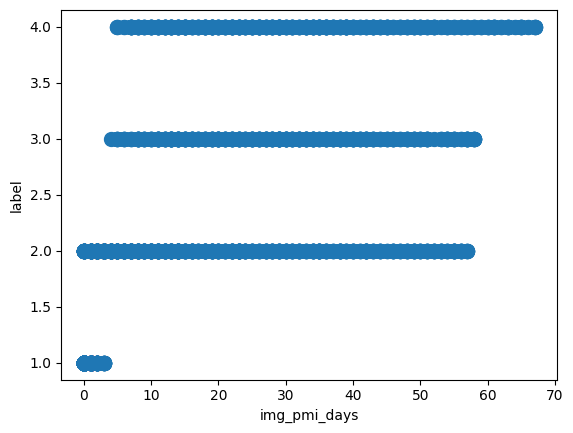

In [48]:
df_sod_pmi_filtered.plot.scatter(x = 'img_pmi_days', y = 'label', s = 100)